In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

import scipy.stats
import warnings
from collections import Counter
from sklearn.metrics import precision_score


import re,random
import seaborn as sns
import string



In [5]:

train = pd.read_csv("BBC News Train.csv")
test = pd.read_csv("BBC News Test.csv")
smp = pd.read_csv("BBC News Sample Solution.csv")

In [10]:
train['category_id'] = train['Category'].factorize()[0]

train['category_id'][0:10]

0    0
1    0
2    0
3    1
4    0
5    2
6    3
7    4
8    0
9    4
Name: category_id, dtype: int64

In [12]:
category_id_train = train[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_train = dict(category_id_train.values)
id_to_category = dict(category_id_train[['category_id', 'Category']].values)

In [14]:
category_to_train


{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [15]:
id_to_category


{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

<AxesSubplot:xlabel='Category'>

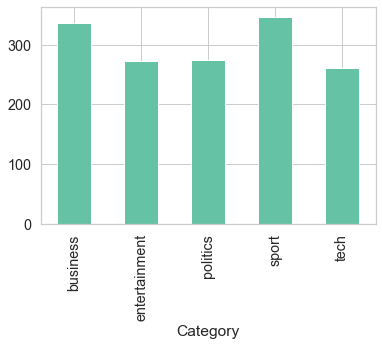

In [17]:
train.groupby('Category').category_id.count()
train.groupby('Category').category_id.count().plot.bar(ylim=0)

In [30]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(train.Text).toarray()

In [31]:
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) 

NameError: name 'TSNE' is not defined

In [19]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

for category, category_id in sorted(category_to_train.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

NameError: name 'projected_features' is not defined

In [40]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LogisticRegression(random_state=0),
]

In [46]:
labels = train.category_id 

In [47]:
from sklearn.feature_selection import chi2

for Category, category_id in sorted(category_to_train.items()):
  features_chi2 = chi2(features, labels == category_id)                  
  indices = np.argsort(features_chi2[0])                                 
  feature_names = np.array(tfidf.get_feature_names())[indices]            
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]  

In [50]:

model = LogisticRegression(random_state=0)


X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, train.index, test_size=0.33, random_state=0)


model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 8.5, 'Predicted')

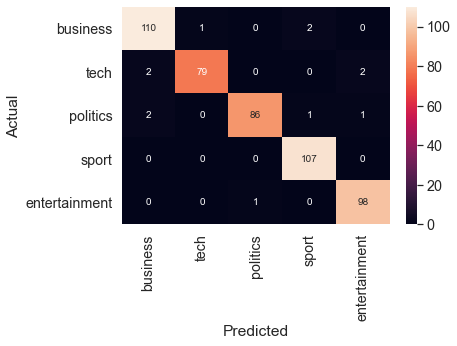

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_train.Category.values, yticklabels=category_id_train.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [54]:
model.fit(features, labels)

LogisticRegression(random_state=0)

In [55]:
test_features = tfidf.transform(test_df.Text.tolist())

Y_pred = model.predict(test_features)

NameError: name 'test_df' is not defined

In [56]:
model.coef_


array([[ 0.46799432,  0.01813872, -0.0715333 , ..., -0.03318298,
         0.0068823 , -0.02849203],
       [-0.02957523, -0.04366737, -0.01371468, ...,  0.00362675,
        -0.02877942, -0.02070068],
       [ 0.05006025, -0.05159908, -0.04674601, ..., -0.00638322,
        -0.03112648, -0.02362395],
       [-0.61687406, -0.04152046, -0.05352312, ...,  0.08450437,
         0.08574049,  0.09981232],
       [ 0.12839471,  0.11864819,  0.18551711, ..., -0.04856492,
        -0.03271689, -0.02699566]])

In [58]:
from sklearn.feature_selection import chi2

N = 5
for Category, category_id in sorted(category_to_train.items()):
  indices = np.argsort(model.coef_[category_id])  
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]

In [59]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)


for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Hooli stock price soared after a dip in PiedPiper revenue growth."
  - Predicted as: 'business'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'business'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'



In [ ]:
test = pd.read_csv("BBC News Test.csv")

In [60]:
test_features = tfidf.transform(test.Text.tolist())

Y_pred = model.predict(test_features)

In [61]:
Y_pred_name =[]
for cat_id in Y_pred :
    Y_pred_name.append(id_to_category[cat_id])

In [63]:
submission = pd.DataFrame({
        "ArticleId": test["ArticleId"],
        "Category": Y_pred_name
    })

In [64]:
submission.head()


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
